In [ ]:
# Importing google drive
from google.colab import drive
drive.mount('/content/drive')
%ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
drive/  sample_data/


In [ ]:
from zipfile import ZipFile
import tarfile


class file_to_extract:
  "Opening zip file, and getting the images"
  def __init__(self,path):
    self.path = path
  
  def extract_file(self):
    "Extract only tar file from a zip file"
    file_name=self.path
    with ZipFile(file_name,'r') as zipObj:
      ListOfFiles = zipObj.namelist()
      for filename in ListOfFiles:
        if filename.endswith('.tgz'):
          zipObj.extract(filename)
          tar = tarfile.open(filename, "r:gz")
          tar.extractall()
          tar.close()
      zipObj.close()
      
# Extracting file containing the images
img_file = file_to_extract("/content/drive/My Drive/Computer_vision/data.zip")
img_file.extract_file()

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt


class album:
  "Creating and manipulating with a gallery of images"

  def __init__(self, filename):
    self.filename = filename 
  
  def create_metadata_array(self):
    "Create an array of paths of images"
    self.metadata=[]
    for i in os.listdir(self.filename):
      if i[-4:] != '.txt':
        for f in os.listdir(os.path.join(self.filename, i)):
          # Check extension
          ext = os.path.splitext(f)[1]
          if ext == '.jpg': 
            self.metadata.append(os.path.join(self.filename,i,f))
  
  def load_random_images(self, dim=5):
    """Create album of images"""
    self.dim_of_gallery = dim
    self.number_of_images = self.dim_of_gallery**2
    self.create_metadata_array()
    total_number_imgs = len(self.metadata)
    self.random_img_indices = np.random.randint(total_number_imgs,size=(1,self.number_of_images))
    
    #image_list = []
    #for counter in range(0,self.number_of_images):
    #  image = cv2.imread(self.metadata[self.random_img_indices[0,counter]], cv2.IMREAD_COLOR)
    #  image=cv2.resize(image,None,fx=0.4, fy=0.4, interpolation=cv2.INTER_AREA)
    #  image_list.append(np.array(image))

    #return np.array(image_list)

def show_image(image,fig_name):
    plt.figure(figsize=(18,15))
    #Before showing image, bgr color order transformed to rgb order
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.show()
    # Save figure
    plt.savefig(fig_name)

def get_photo_gallery(dimension, images):
    counter=0
    himages=[]
    vimages=[]
    for i in range(dimension):
        for j in range(dimension):
            
            himages.append(images[counter])
            counter+=1

        himage=np.hstack((himages))
        vimages.append(himage)
        himages=[]
    image_matrix=np.vstack((vimages))
    return image_matrix

photo_gallery:(1000, 1000, 3)


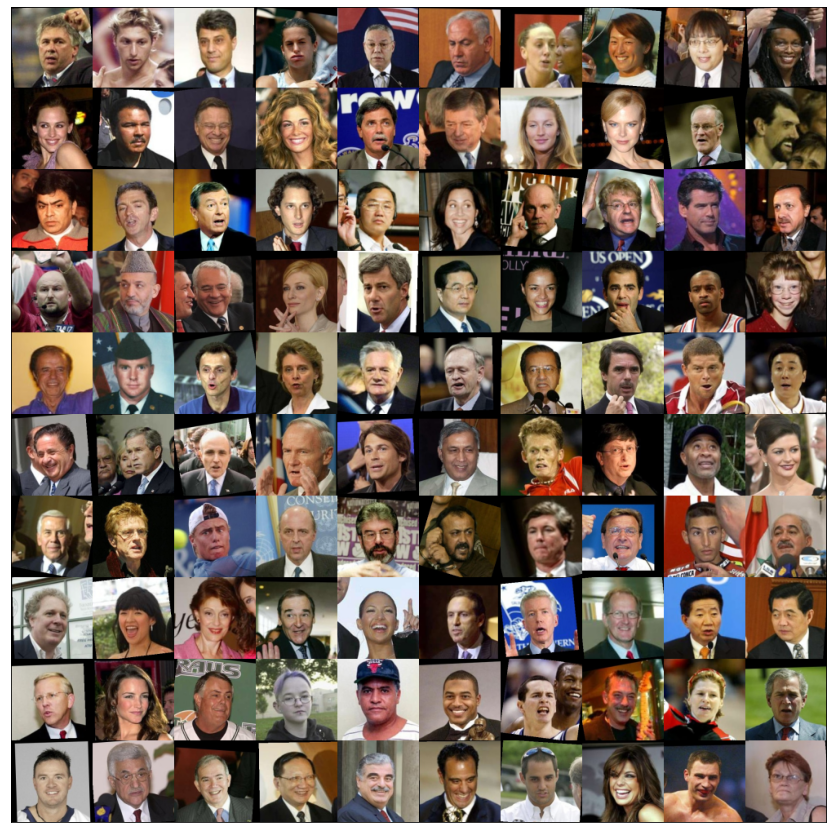

<Figure size 432x288 with 0 Axes>

In [ ]:
filename = 'lfw_funneled'
dimension = 10
images = album(filename)
images.load_random_images(dim=dimension)
image_list = []
for counter in range(0,images.number_of_images):
  image = cv2.imread(images.metadata[images.random_img_indices[0,counter]], cv2.IMREAD_COLOR)
  image=cv2.resize(image,None,fx=0.4, fy=0.4, interpolation=cv2.INTER_AREA)
  image_list.append(np.array(image))
image_list = np.array(image_list)
photo_gallery=get_photo_gallery(dimension, image_list)
print("photo_gallery:{}".format(photo_gallery.shape))
show_image(photo_gallery,'loaded_images')

In [ ]:
import bz2

!cp "drive/My Drive/Computer_vision/model.py" .
!cp "drive/My Drive/Computer_vision/utils.py" .
!cp "drive/My Drive/Computer_vision/open_face.h5" .
!cp "drive/My Drive/Computer_vision/Align.py" .

from urllib.request import urlopen

def download_landmarks(dst_file):
    url = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'
    decompressor = bz2.BZ2Decompressor()
    
    with urlopen(url) as src, open(dst_file, 'wb') as dst:
        data = src.read(1024)
        while len(data) > 0:
            dst.write(decompressor.decompress(data))
            data = src.read(1024)

dst_dir = 'models'
dst_file = os.path.join(dst_dir, 'landmarks.dat')

if not os.path.exists(dst_file):
    os.makedirs(dst_dir)
    download_landmarks(dst_file)

100 images have been scaned
100 faces have been detected


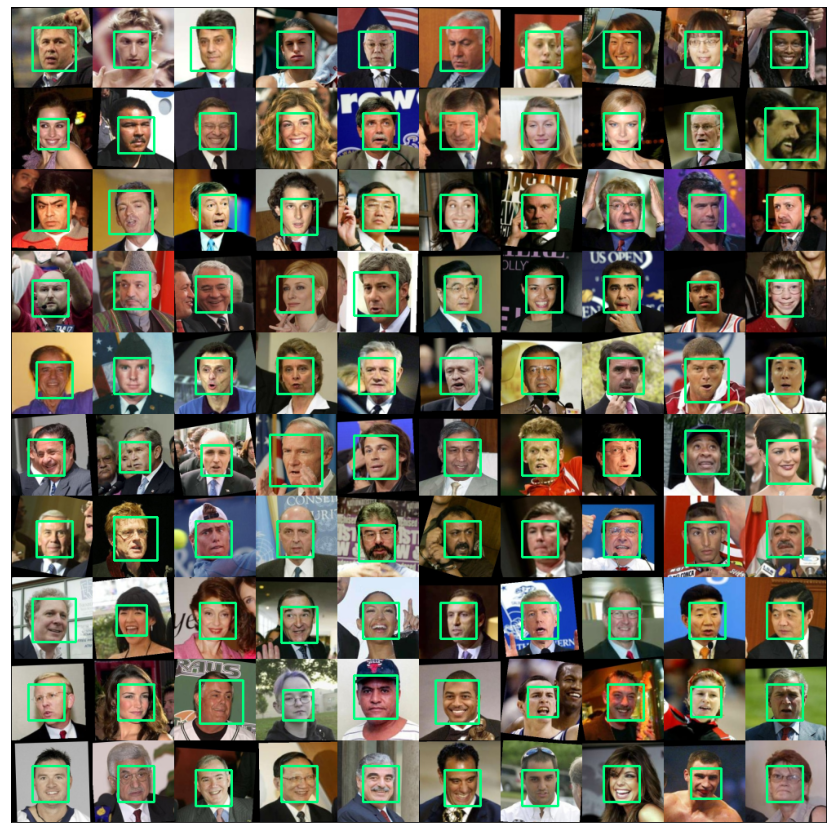

<Figure size 432x288 with 0 Axes>

In [ ]:
import dlib
from Align import AlignDlib
from model import create_model
import pandas as pd


# Face detection using Dlib library
face_counter = 0
image_list_d = []
for counter in range(0,images.number_of_images):
  img = cv2.imread(images.metadata[images.random_img_indices[0,counter]], cv2.IMREAD_COLOR)
  img=cv2.resize(img,None,fx=0.4, fy=0.4, interpolation=cv2.INTER_AREA)
  alignment = AlignDlib('models/landmarks.dat')
  face = alignment.getLargestFaceBoundingBox(img)
  if face is not None:
    x = face.left()
    y = face.top()
    w = face.width()
    h = face.height()
    img1 = cv2.rectangle(img ,(x,y),(x+w,y+h),(127,255,0),2)
    face_counter +=1
  elif face is None:
    img1 = img

  image_list_d.append(np.array(img1))

images_d = np.array(image_list_d)
print("{} images have been scaned".format(dimension*dimension))
print("{} faces have been detected".format(face_counter))
Dlib_detection=get_photo_gallery(dimension, images_d)
show_image(Dlib_detection, 'Dlib_detection')

100 images have been scaned
97 faces have been detected


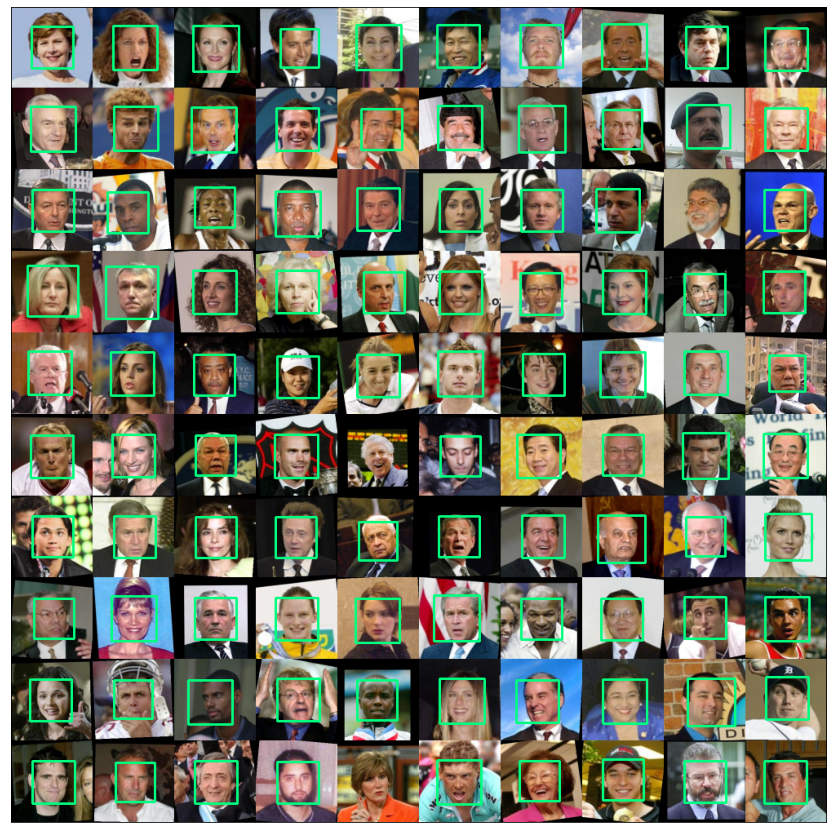

<Figure size 432x288 with 0 Axes>

In [ ]:
# Using Viola-Jones algorithm for face detection

class FaceDetector():

    def __init__(self,faceCascadePath):
        self.faceCascade=cv2.CascadeClassifier(faceCascadePath)


    def detect(self, image, scaleFactor=1.1,minNeighbors=5,minSize=(30,30)):
        
        #function return rectangle coordinates of faces for given image
        rects=self.faceCascade.detectMultiScale(image,scaleFactor=scaleFactor,minNeighbors=minNeighbors,minSize=minSize)
        return rects

frontal_cascade_path=cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
fd=FaceDetector(frontal_cascade_path)
face_counter=0
images_vj = []
for counter in range(0,images.number_of_images):
    img_org = cv2.imread(images.metadata[images.random_img_indices[0,counter]], cv2.IMREAD_COLOR)
    img_org = cv2.resize(img_org,None,fx=0.4, fy=0.4, interpolation=cv2.INTER_AREA)
    image_gray=cv2.cvtColor(img_org,cv2.COLOR_BGR2GRAY)
    faceRect=fd.detect(image_gray,scaleFactor=1.1,minNeighbors=5,minSize=(30,30))
    first_detection=False
    for (x,y,w,h) in faceRect:
        if first_detection==False:
            face_counter+=1
            img1 = cv2.rectangle(img_org,(x,y),(x+w,y+h),(127,255,0),2)
            first_detection=True
        else:
            print("Second detection ignored in a image")
    images_vj.append(np.array(img_org))
images_vj = np.array(images_vj)
print("{} images have been scaned".format(dimension*dimension))
print("{} faces have been detected".format(face_counter))
VJ_detection=get_photo_gallery(dimension, images_vj)
show_image(VJ_detection, 'VJ_detection')

In [ ]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

In [ ]:
def create_paths_array(path, name_list):
  "Create an array of paths of images"
  metadata=[]
  for i in os.listdir(path):
    if i[-4:] != '.txt' and i in name_list:
      for f in os.listdir(os.path.join(path, i)):
        # Check extension
        ext = os.path.splitext(f)[1]
        if ext == '.jpg': 
          metadata.append(IdentityMetadata(path, i, f))
  return metadata

list_of_names = ['Ariel_Sharon', 'Arnold_Schwarzenegger','Colin_Powell','Donald_Rumsfeld','Gerhard_Schroeder','Hugo_Chavez','Vladimir_Putin', 'Britney_Spears', 'Ben_Affleck','Brad_Pitt','Tony_Blair','Justin_Timberlake','Demi_Moore','Guy_Ritchie','Jennifer_Garner','Jodie_Foster','John_Snow','Kate_Winslet','Kim_Jong-Il','Mark_Wahlberg','Monica_Bellucci','Yukiko_Okudo','Milo_Djukanovic','Momcilo_Perisic','Bill_Gates','Colin_Farrell','Dalai_Lama','David_Beckham','Denzel_Washington','Leonardo_DiCaprio']
filename = 'lfw_funneled'
metadata = create_paths_array(filename, list_of_names)

In [ ]:
names = np.array([m.name for m in metadata])
img_counts = pd.Series(names).value_counts()
img_counts = pd.DataFrame(img_counts)
img_counts.index.name = 'names'
img_counts.reset_index(inplace=True)
img_counts = img_counts.rename(columns={0:"number_of_images"})
print(img_counts)

                    names  number_of_images
0            Colin_Powell               236
1              Tony_Blair               144
2         Donald_Rumsfeld               121
3       Gerhard_Schroeder               109
4            Ariel_Sharon                77
5             Hugo_Chavez                71
6          Vladimir_Putin                49
7   Arnold_Schwarzenegger                42
8           David_Beckham                31
9              Bill_Gates                17
10              John_Snow                17
11         Britney_Spears                14
12        Jennifer_Garner                12
13      Leonardo_DiCaprio                 9
14          Colin_Farrell                 9
15      Justin_Timberlake                 8
16            Ben_Affleck                 7
17      Denzel_Washington                 5
18        Monica_Bellucci                 4
19           Kate_Winslet                 4
20            Kim_Jong-Il                 4
21          Mark_Wahlberg       

In [ ]:
from tqdm import tqdm
# Face_detection using Dlib
def load_image(path):
    img = cv2.imread(path, 1)
    return img[...,::-1]
  
def align_image(img):
    return alignment.align(96, img, alignment.getLargestFaceBoundingBox(img), 
                           landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
    
alignment = AlignDlib('models/landmarks.dat')

# Load pretrained Model
model = create_model()
model.load_weights('open_face.h5')
embedded = np.zeros((np.array(metadata).shape[0], 128))

# Get embeddings
for i, m in tqdm(enumerate(metadata)):
    try:
      img = load_image(m.image_path())
      img = align_image(img)
      # scale RGB values to interval [0,1]
      img = (img / 255.).astype(np.float32)
      # obtain embedding vector for image
      embedded[i] = model.predict(np.expand_dims(img, axis=0))[0]
    except:
      print(i,m)

72it [00:08,  9.17it/s]

70 lfw_funneled/Ariel_Sharon/Ariel_Sharon_0018.jpg


300it [00:34,  9.09it/s]

298 lfw_funneled/Britney_Spears/Britney_Spears_0008.jpg


418it [00:47,  9.07it/s]

416 lfw_funneled/Arnold_Schwarzenegger/Arnold_Schwarzenegger_0008.jpg


435it [00:48,  9.31it/s]

433 lfw_funneled/Arnold_Schwarzenegger/Arnold_Schwarzenegger_0029.jpg


541it [01:00,  9.22it/s]

539 lfw_funneled/Donald_Rumsfeld/Donald_Rumsfeld_0115.jpg


1012it [01:52,  9.00it/s]


In [ ]:
print("Embedded array: \n" + str(embedded))
print("Shape of embedded array: " + str(embedded.shape))
non_zero_elements = np.nonzero(embedded)
non_zero_elements = set(non_zero_elements[0])
print("Rows with non zero values: " + str(non_zero_elements))
print("Number of rows with non zero values: " + str(len(non_zero_elements)))
zero_elements = np.nonzero(embedded == 0)
zero_elements = set(zero_elements[0])
print("Rows with zero values: " + str(zero_elements))
print("Number of rows with zero values: " + str(len(zero_elements)))

Embedded array: 
[[-0.01229323  0.07336175  0.10813172 ...  0.03100987  0.04085858
  -0.06817126]
 [ 0.08299381  0.06357299  0.17537521 ...  0.10118853  0.07733992
  -0.09981144]
 [-0.0118418   0.12724239  0.19856441 ...  0.12934247 -0.01998531
  -0.085072  ]
 ...
 [-0.02102787  0.05155891  0.1588366  ... -0.00258841  0.21236704
   0.10589512]
 [-0.04289277  0.09711017  0.18292297 ... -0.00030125  0.16578801
   0.05623277]
 [-0.09507619  0.0622158   0.08429607 ...  0.04809302  0.08484368
   0.08992003]]
Shape of embedded array: (1012, 128)
Rows with non zero values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 

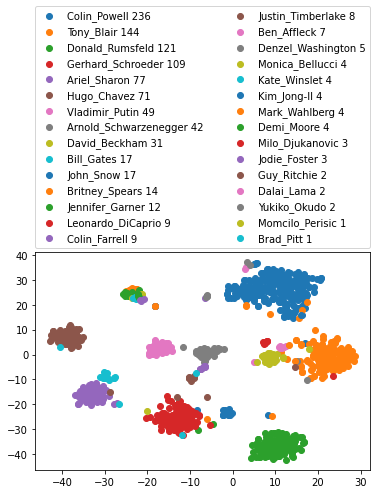

In [ ]:
from sklearn.manifold import TSNE
# Visualisation of embeddings in 2D using TSNE
X_embedded = TSNE(n_components=2).fit_transform(embedded)
#cmap = plt.get_cmap('jet')
#colors = cmap(np.linspace(0, 1.0, len(set(names))))
for name in img_counts.iloc[:,0]:
    idx = names == name
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=name + ' ' + str(img_counts[img_counts.names==name].number_of_images.item()))

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.);

In [ ]:
df = pd.DataFrame(embedded)
df["output"] = names
df.to_csv("embedded.csv",index=False)

# Name encoding
from sklearn.preprocessing import LabelEncoder
names_encode = LabelEncoder().fit(names)
Y = names_encode.transform(names)
y = np.zeros((embedded.shape[0],len(set(Y))),dtype=int)
for i,name in enumerate(names):
  ind = Y[i]
  y[i][ind]=1
train_idx = np.arange(embedded.shape[0]) % 5 != 0
test_idx = np.arange(embedded.shape[0]) % 5 == 0

X_train = embedded[train_idx]
y_train = y[train_idx]

X_test = embedded[test_idx]
y_test = y[test_idx]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)
acc_knn = accuracy_score(y_test, knn.predict(X_test))

print(f'KNN accuracy = {acc_knn}')

KNN accuracy = 0.9408866995073891


In [ ]:
import keras
from keras.models import Sequential 
import tensorflow
from keras.layers import Dense, Activation 
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

output_dim = y_train.shape[1]
input_dim = X_train.shape[1]

batch_size = 100
nb_epoch = 300

model_relu = Sequential()

model_relu.add(Dense(100, activation='relu', input_shape=(input_dim,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(50, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim,activation='softmax'))

print(model_relu.summary())
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch,validation_data=(X_test,y_test))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               12900     
_________________________________________________________________
batch_normalization_10 (Batc (None, 100)               400       
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 50)                5050      
_________________________________________________________________
batch_normalization_11 (Batc (None, 50)                200       
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 30)               

In [ ]:
from sklearn.svm import LinearSVC

encoder = LabelEncoder()
encoder.fit(names)

# Different encoding of names, just integers
y = encoder.transform(names)

train_idx = np.arange(embedded.shape[0]) % 5 != 0
test_idx = np.arange(embedded.shape[0]) % 5 == 0

# 50 train examples of 10 identities (5 examples each)
X_train = embedded[train_idx]
# 50 test examples of 10 identities (5 examples each)
X_test = embedded[test_idx]

y_train = y[train_idx]
y_test = y[test_idx]

knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
svc = LinearSVC()

knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

acc_knn = accuracy_score(y_test, knn.predict(X_test))
acc_svc = accuracy_score(y_test, svc.predict(X_test))

print(f'KNN accuracy = {acc_knn}, SVM accuracy = {acc_svc}')

KNN accuracy = 0.9408866995073891, SVM accuracy = 0.9458128078817734


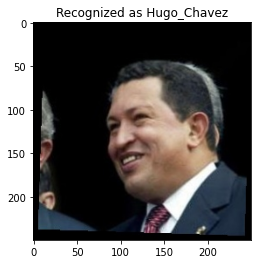

In [ ]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 29
metadata = np.array(metadata)

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svc.predict([embedded[test_idx][example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Recognized as {example_identity}');
